# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [4]:
# Code
len(set(df['country']))

219

In [5]:
print(df['year'].max() - df['year'].min())

33


In [12]:
#No not every country has a row for every year present
country_counts = df.groupby('country').size()

years_present = df['year'].unique()
missing_years = {}

for country, group in df.groupby('country'):
    years_available = group['year'].unique()
    missing_years[country] = [year for year in years_present if year not in years_available]
print("Count of rows for each country:")
print(country_counts)
print("\nMissing years for each country:")
for country, missing_year_list in missing_years.items():
    print(f"{country}: {missing_year_list}")

Count of rows for each country:
country
Afghanistan                  34
Albania                      34
Algeria                      34
American Samoa               34
Andorra                      34
                             ..
Wallis and Futuna Islands    34
West Bank and Gaza Strip     34
Yemen                        34
Zambia                       34
Zimbabwe                     34
Length: 219, dtype: int64

Missing years for each country:
Afghanistan: []
Albania: []
Algeria: []
American Samoa: []
Andorra: []
Angola: []
Anguilla: []
Antigua and Barbuda: []
Argentina: []
Armenia: []
Aruba: []
Australia: []
Austria: []
Azerbaijan: []
Bahamas: []
Bahrain: []
Bangladesh: []
Barbados: []
Belarus: []
Belgium: []
Belize: []
Benin: []
Bermuda: []
Bhutan: []
Bolivia (Plurinational State of): []
Bonaire, Saint Eustatius and Saba: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006

In [13]:
grouped = df.groupby(['country', 'year']).size().reset_index(name='Count')

# Find missing years for each country
missing_years = grouped.groupby('country').apply(lambda x: list(set(range(min(df['year']), max(df['year'])+1)) - set(x['year'])))

In [14]:
missing_years

country
Afghanistan                  []
Albania                      []
Algeria                      []
American Samoa               []
Andorra                      []
                             ..
Wallis and Futuna Islands    []
West Bank and Gaza Strip     []
Yemen                        []
Zambia                       []
Zimbabwe                     []
Length: 219, dtype: object

In [16]:
selected_columns = df.iloc[:, 2:57]

non_null_rows = selected_columns.notnull().any(axis=1)

count_non_null_rows = non_null_rows.sum()

count_non_null_rows

3483

## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be:

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [18]:
def classify_age(code):
    age_ranges = {
        '014': '0-14 years of age',
        '1524': '15-24 years of age',
        '2534': '25-34 years of age',
        '3544': '35-44 years of age',
        '4554': '45-54 years of age',
        '5564': '55-64 years of age',
        '65': '65 years or older'
    }
    return age_ranges.get(code, 'Unknown')

def classify_method(method):
    method_mapping = {
        'newsp': 'Pulmonary Smear (+)',
        'newsn': 'Pulmonary Smear (-)',
        'newep': 'Extrapulmonary',
        'newrel': 'Relapse'
    }
    return method_mapping.get(method, method)


In [46]:
melted_df = pd.melt(df, id_vars=['country', 'year'], var_name='method')

In [74]:
 melted_df = pd.melt(df, id_vars=['country', 'year'], var_name='method')

In [75]:
import re
pattern = r'_([mf])(\d{1,4})$'
matches = melted_df['method'].str.extract(pattern, flags=re.IGNORECASE)

# Assign extracted gender and age to new columns
melted_df['gender'] = matches[0].map({'m': 'male', 'f': 'female'})
melted_df['age'] = matches[1]


In [78]:
def remove_last_substring(s):
    last_underscore_index = s.rfind('_')
    return s[:last_underscore_index]

melted_df['method'] = melted_df['method'].apply(remove_last_substring)

In [80]:
melted_df['method'] = melted_df['method'].str.replace('_','')

In [82]:
melted_df['method'] = melted_df['method'].apply(lambda x: {
    'newsp': 'Pulmonary Smear (+)',
    'newsn': 'Pulmonary Smear (-)',
    'newep': 'Extrapulmonary',
    'newrel': 'Relapse'
}.get(x, x))

In [84]:
melted_df['age'] = melted_df['age'].apply(lambda x: {
    '014': '0-14 years of age',
    '1524': '15-24 years of age',
    '2534': '25-34 years of age',
    '3544': '35-44 years of age',
    '4554': '45-54 years of age',
    '5564': '55-64 years of age',
    '65': '65 years or older'
}.get(x, 'Unknown'))

In [85]:
melted_df

,country,year,method,value,gender,age
0,Afghanistan,1980,Pulmonary Smear (+),NaN,male,0-14 years of age
1,Afghanistan,1981,Pulmonary Smear (+),NaN,male,0-14 years of age
2,Afghanistan,1982,Pulmonary Smear (+),NaN,male,0-14 years of age
3,Afghanistan,1983,Pulmonary Smear (+),NaN,male,0-14 years of age
4,Afghanistan,1984,Pulmonary Smear (+),NaN,male,0-14 years of age
...,...,...,...,...,...,...
405435,Zimbabwe,2009,Relapse,NaN,female,65 years or older
405436,Zimbabwe,2010,Relapse,NaN,female,65 years or older
405437,Zimbabwe,2011,Relapse,NaN,female,65 years or older
405438,Zimbabwe,2012,Relapse,NaN,female,65 years or older


## Question 3: Create a graph that shows when countries started to report TB cases.

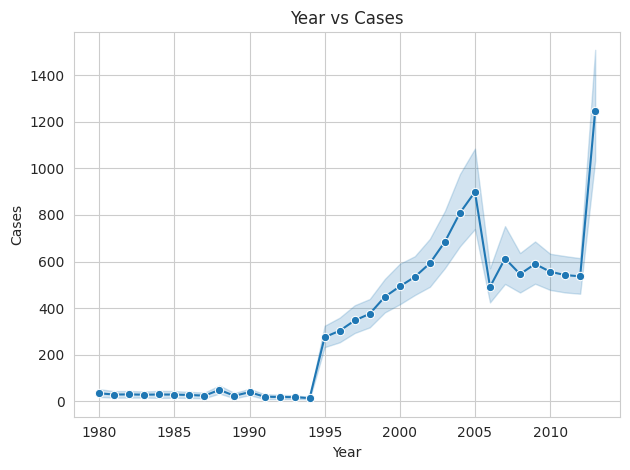

In [89]:
# Code
sns.set_style("whitegrid")

# Plot data
sns.lineplot(data=melted_df, x='year', y='value', marker='o')

# Add title and labels
plt.title('Year vs Cases')
plt.xlabel('Year')
plt.ylabel('Cases')

# Adjust layout and display plot
plt.tight_layout()
plt.show()